<a href="https://colab.research.google.com/github/ikhwandio4/PCVK_Ganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama:Ikhwandi

NNim: 2241720028

Kleas: 3F

Matkul: PCVK


# tugas praktikum

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut
berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

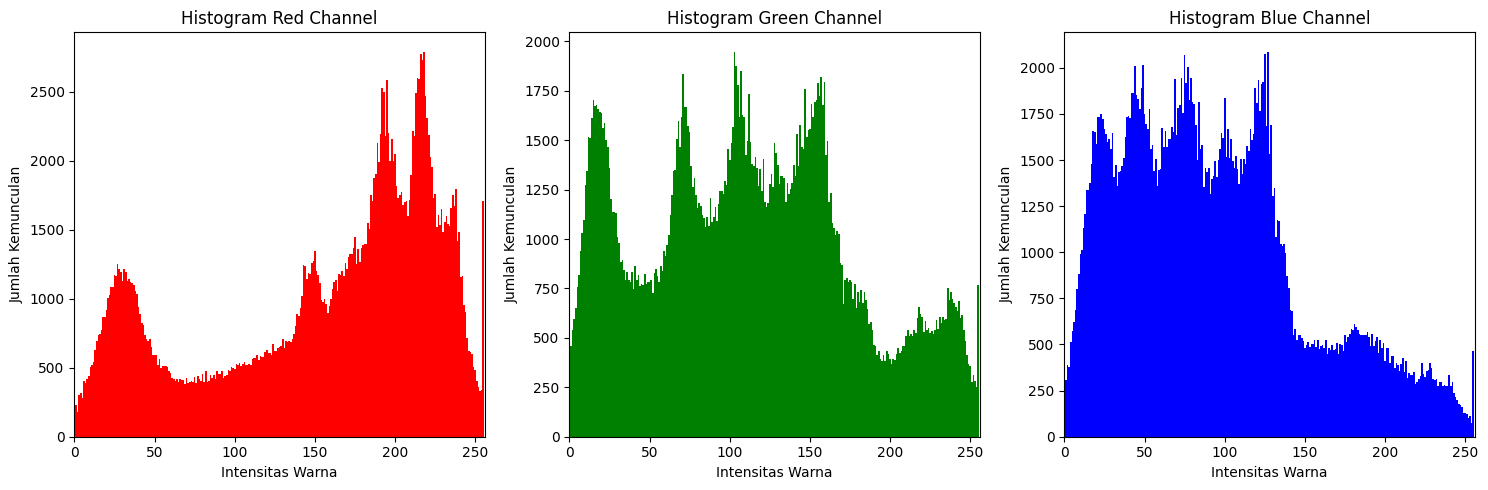

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Langkah 2: Input Image
# Baca citra dalam mode warna (BGR secara default di OpenCV)
image = cv2.imread('/content/drive/MyDrive/pcvk/lena.jpg')

# Periksa apakah citra berhasil dibaca
if image is None:
    print("Gagal membaca citra. Pastikan file 'lena.jpg' berada di direktori yang benar.")
    exit()

# Konversi citra dari BGR ke RGB untuk penampilan yang benar di matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Langkah 3: Menghitung Jumlah Kemunculan Setiap Pixel Warna
# Hitung histogram untuk masing-masing kanal warna
colors = ('r', 'g', 'b')
channel_names = ['Red', 'Green', 'Blue']

# Buat plot terpisah untuk setiap kanal warna dalam diagram batang
plt.figure(figsize=(15, 5))

for i, (color, channel) in enumerate(zip(colors, channel_names)):
    plt.subplot(1, 3, i+1)  # 3 subplot untuk R, G, B
    hist, bins = np.histogram(image_rgb[:,:,i].flatten(), 256, [0,256])

    # Membuat histogram dalam bentuk diagram batang
    plt.bar(range(256), hist, color=color, width=1.0)
    plt.title(f"Histogram {channel} Channel")
    plt.xlabel("Intensitas Warna")
    plt.ylabel("Jumlah Kemunculan")
    plt.xlim([0,256])  # Batas intensitas warna dari 0 sampai 256

plt.tight_layout()
plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

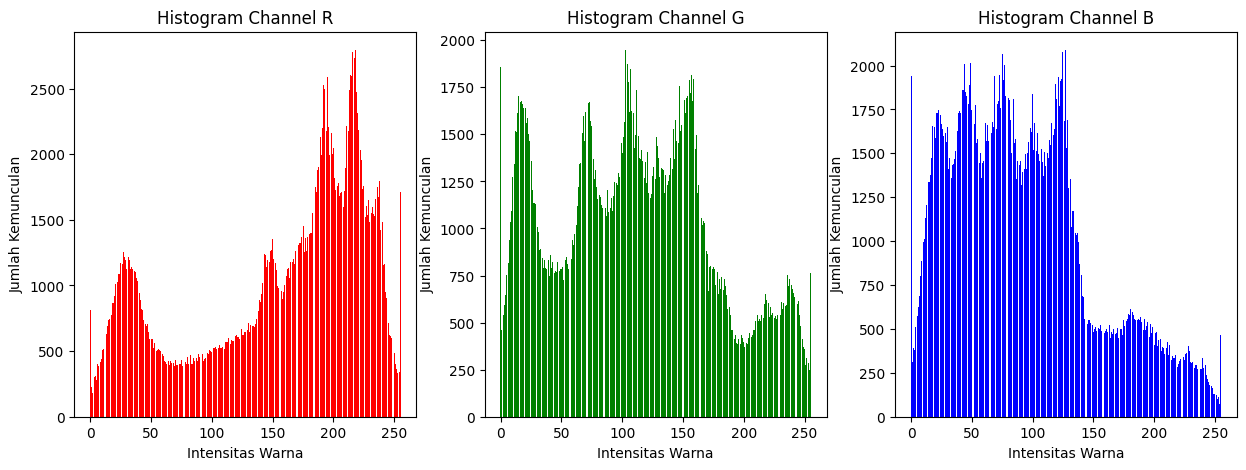

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load gambar lena.jpg
img = np.array(Image.open('/content/drive/MyDrive/pcvk/lena.jpg').convert('RGB'))

# Menghitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada untuk setiap channel
r_hist = np.histogram(img[:,:,0].ravel(), bins=256, range=(0, 256))[0]
g_hist = np.histogram(img[:,:,1].ravel(), bins=256, range=(0, 256))[0]
b_hist = np.histogram(img[:,:,2].ravel(), bins=256, range=(0, 256))[0]

# Membuat histogram dengan sumbu x adalah intensitas warna dan sumbu y jumlah kemunculan untuk setiap channel
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(256), r_hist, color='red')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.title('Histogram Channel R')

plt.subplot(1, 3, 2)
plt.bar(range(256), g_hist, color='green')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.title('Histogram Channel G')

plt.subplot(1, 3, 3)
plt.bar(range(256), b_hist, color='blue')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.title('Histogram Channel B')

plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

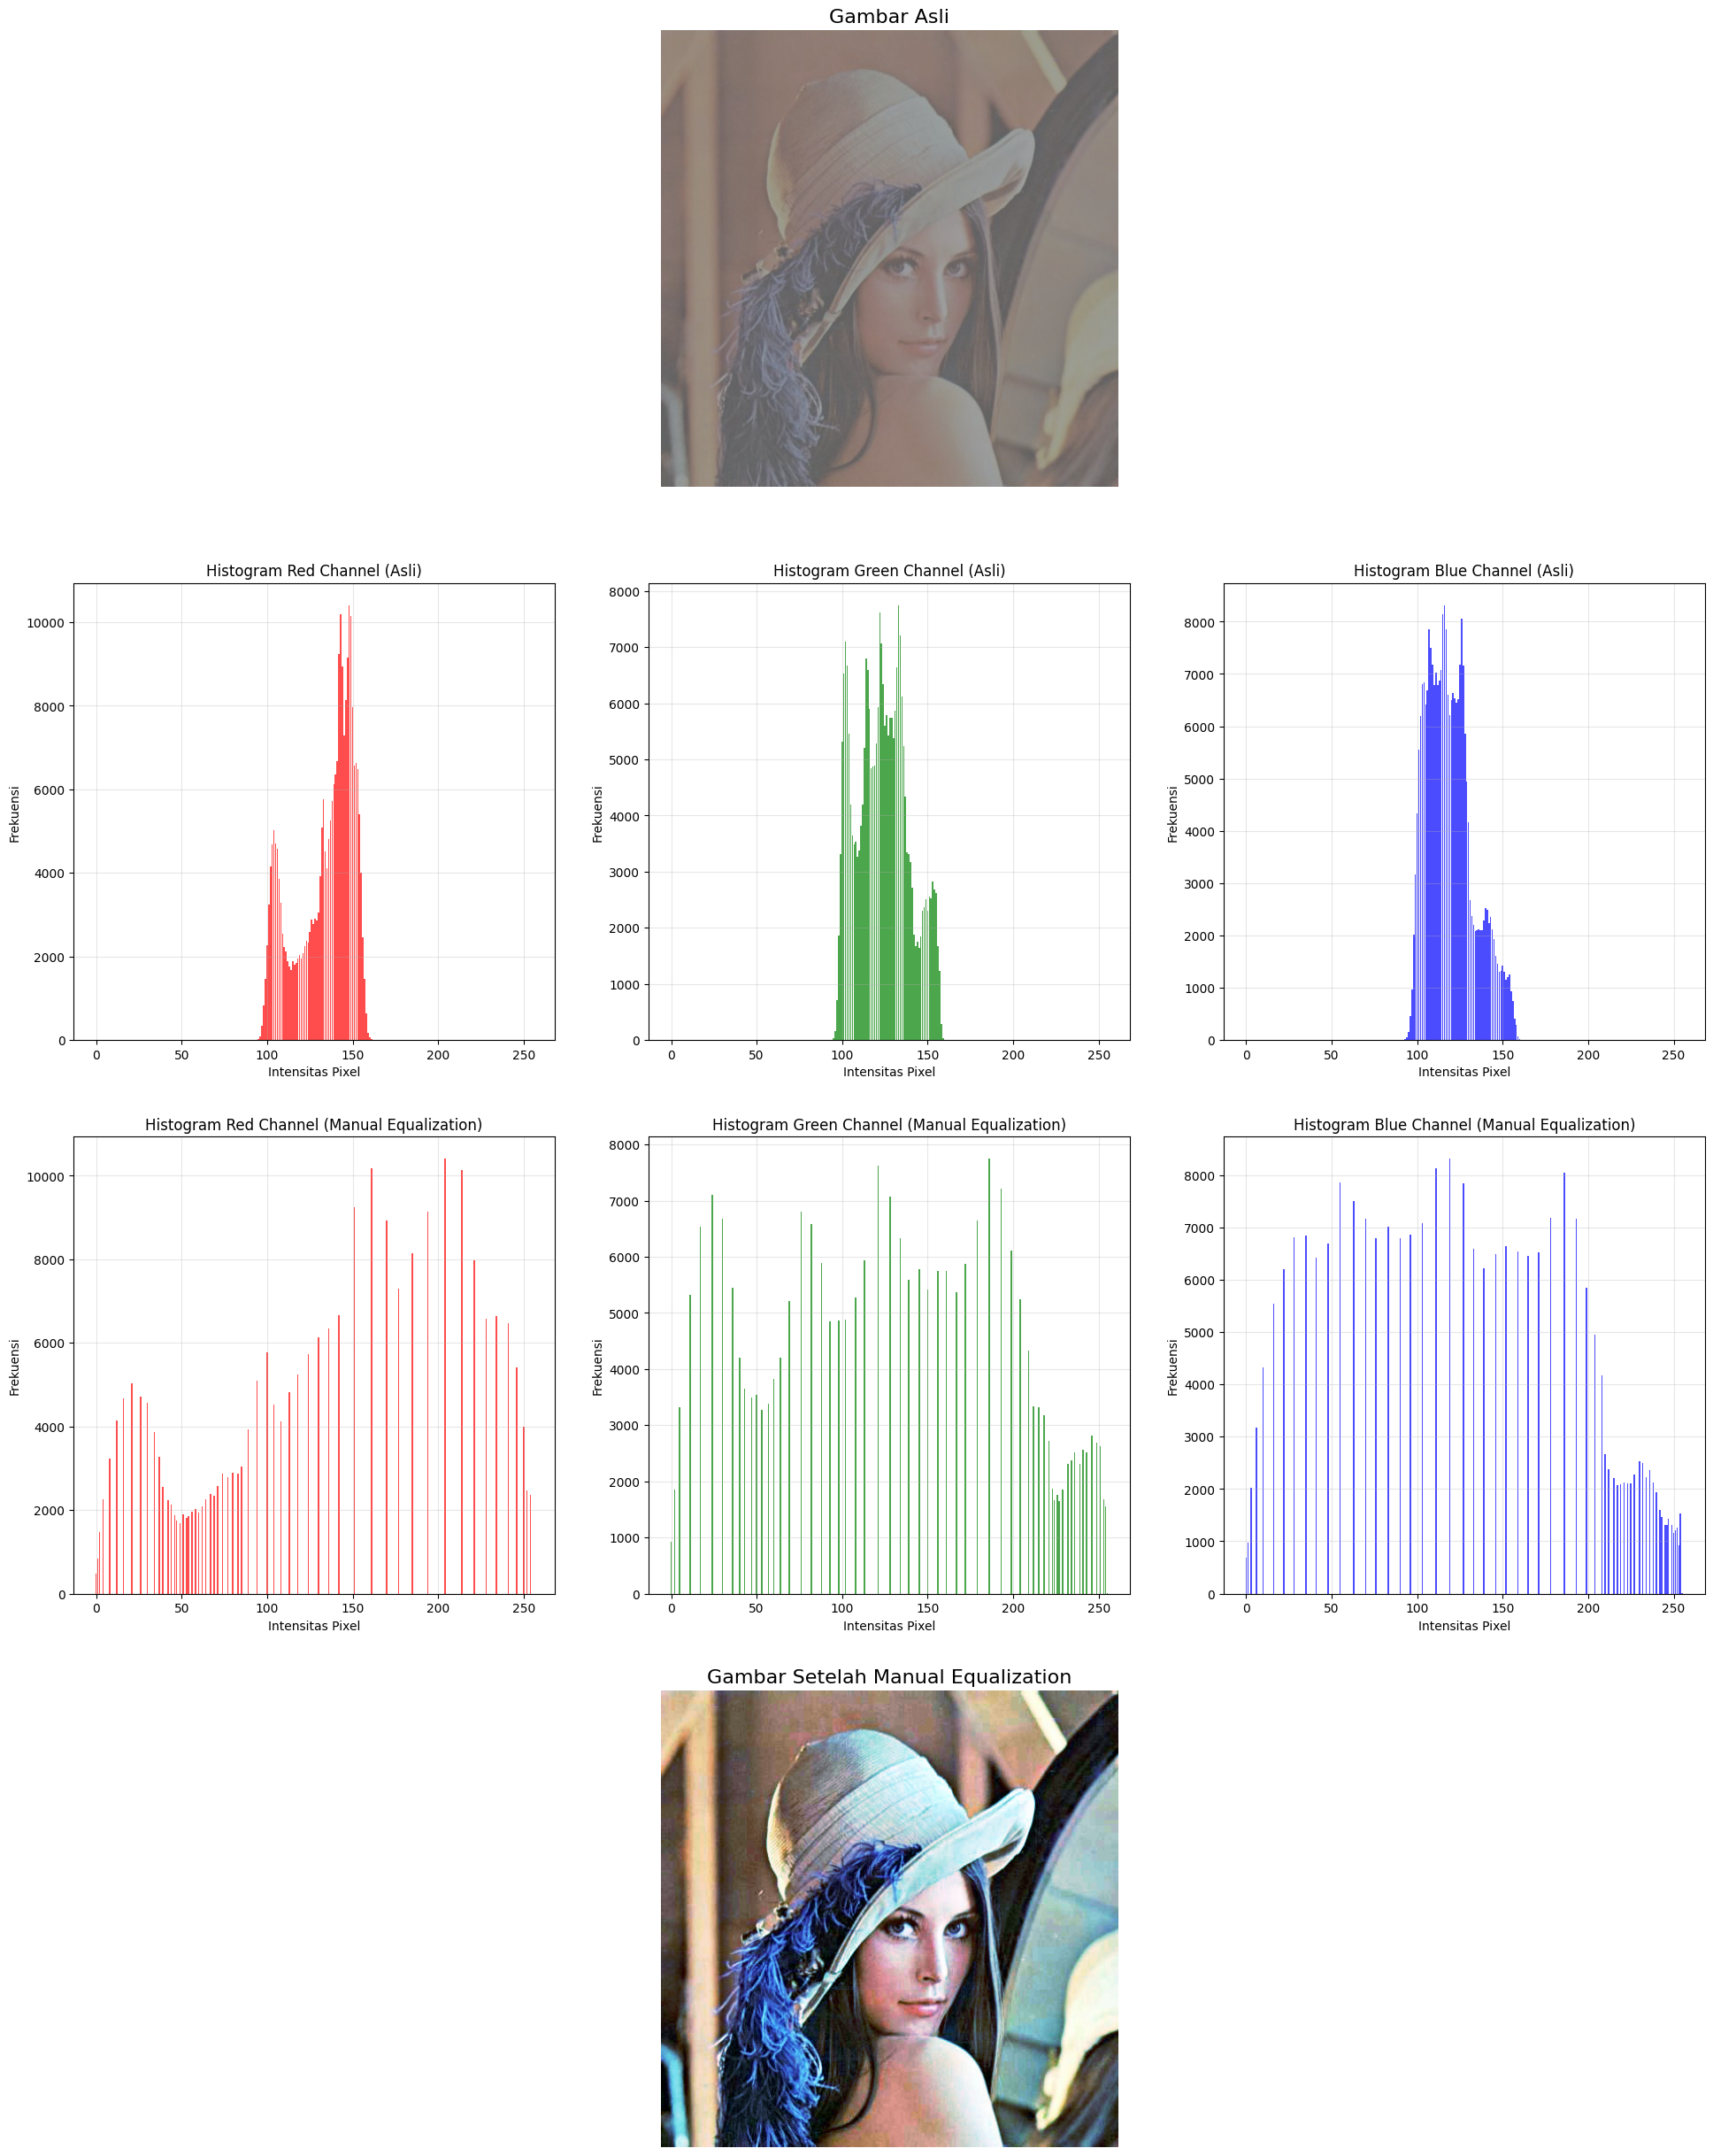

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def manual_histogram_equalization(image):
    # Hitung histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # Hitung cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalisasi CDF
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Buat lookup table
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Aplikasikan histogram equalization
    return cdf[image]

def plot_histogram(ax, data, color, title):
    hist, bins = np.histogram(data.flatten(), 256, [0, 256])
    ax.bar(range(256), hist, color=color, alpha=0.7)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Intensitas Pixel')
    ax.set_ylabel('Frekuensi')
    ax.grid(True, alpha=0.3)

# Baca gambar
image_path = '/content/drive/MyDrive/pcvk/lena_lc.jpg'
img = cv2.imread(image_path)
if img is None:
    print(f"Gagal membaca citra dari path: {image_path}")
    exit()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Pisahkan channel
r, g, b = cv2.split(img)

# Manual equalization
r_eq_manual = manual_histogram_equalization(r)
g_eq_manual = manual_histogram_equalization(g)
b_eq_manual = manual_histogram_equalization(b)

# Gabungkan kembali channel
img_eq_manual = cv2.merge([r_eq_manual, g_eq_manual, b_eq_manual])

# Setup plot
plt.figure(figsize=(20, 25))
gs = GridSpec(4, 3, height_ratios=[1, 1, 1, 1])

# Gambar asli
ax_original = plt.subplot(gs[0, :])
ax_original.imshow(img)
ax_original.set_title('Gambar Asli', fontsize=16)
ax_original.axis('off')

# Histogram asli
plot_histogram(plt.subplot(gs[1, 0]), r, 'red', 'Histogram Red Channel (Asli)')
plot_histogram(plt.subplot(gs[1, 1]), g, 'green', 'Histogram Green Channel (Asli)')
plot_histogram(plt.subplot(gs[1, 2]), b, 'blue', 'Histogram Blue Channel (Asli)')

# Histogram setelah manual equalization
plot_histogram(plt.subplot(gs[2, 0]), r_eq_manual, 'red', 'Histogram Red Channel (Manual Equalization)')
plot_histogram(plt.subplot(gs[2, 1]), g_eq_manual, 'green', 'Histogram Green Channel (Manual Equalization)')
plot_histogram(plt.subplot(gs[2, 2]), b_eq_manual, 'blue', 'Histogram Blue Channel (Manual Equalization)')

# Gambar setelah manual equalization
ax_eq_manual = plt.subplot(gs[3, :])
ax_eq_manual.imshow(img_eq_manual)
ax_eq_manual.set_title('Gambar Setelah Manual Equalization', fontsize=16)
ax_eq_manual.axis('off')

plt.tight_layout(pad=3.0)
plt.show()

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?


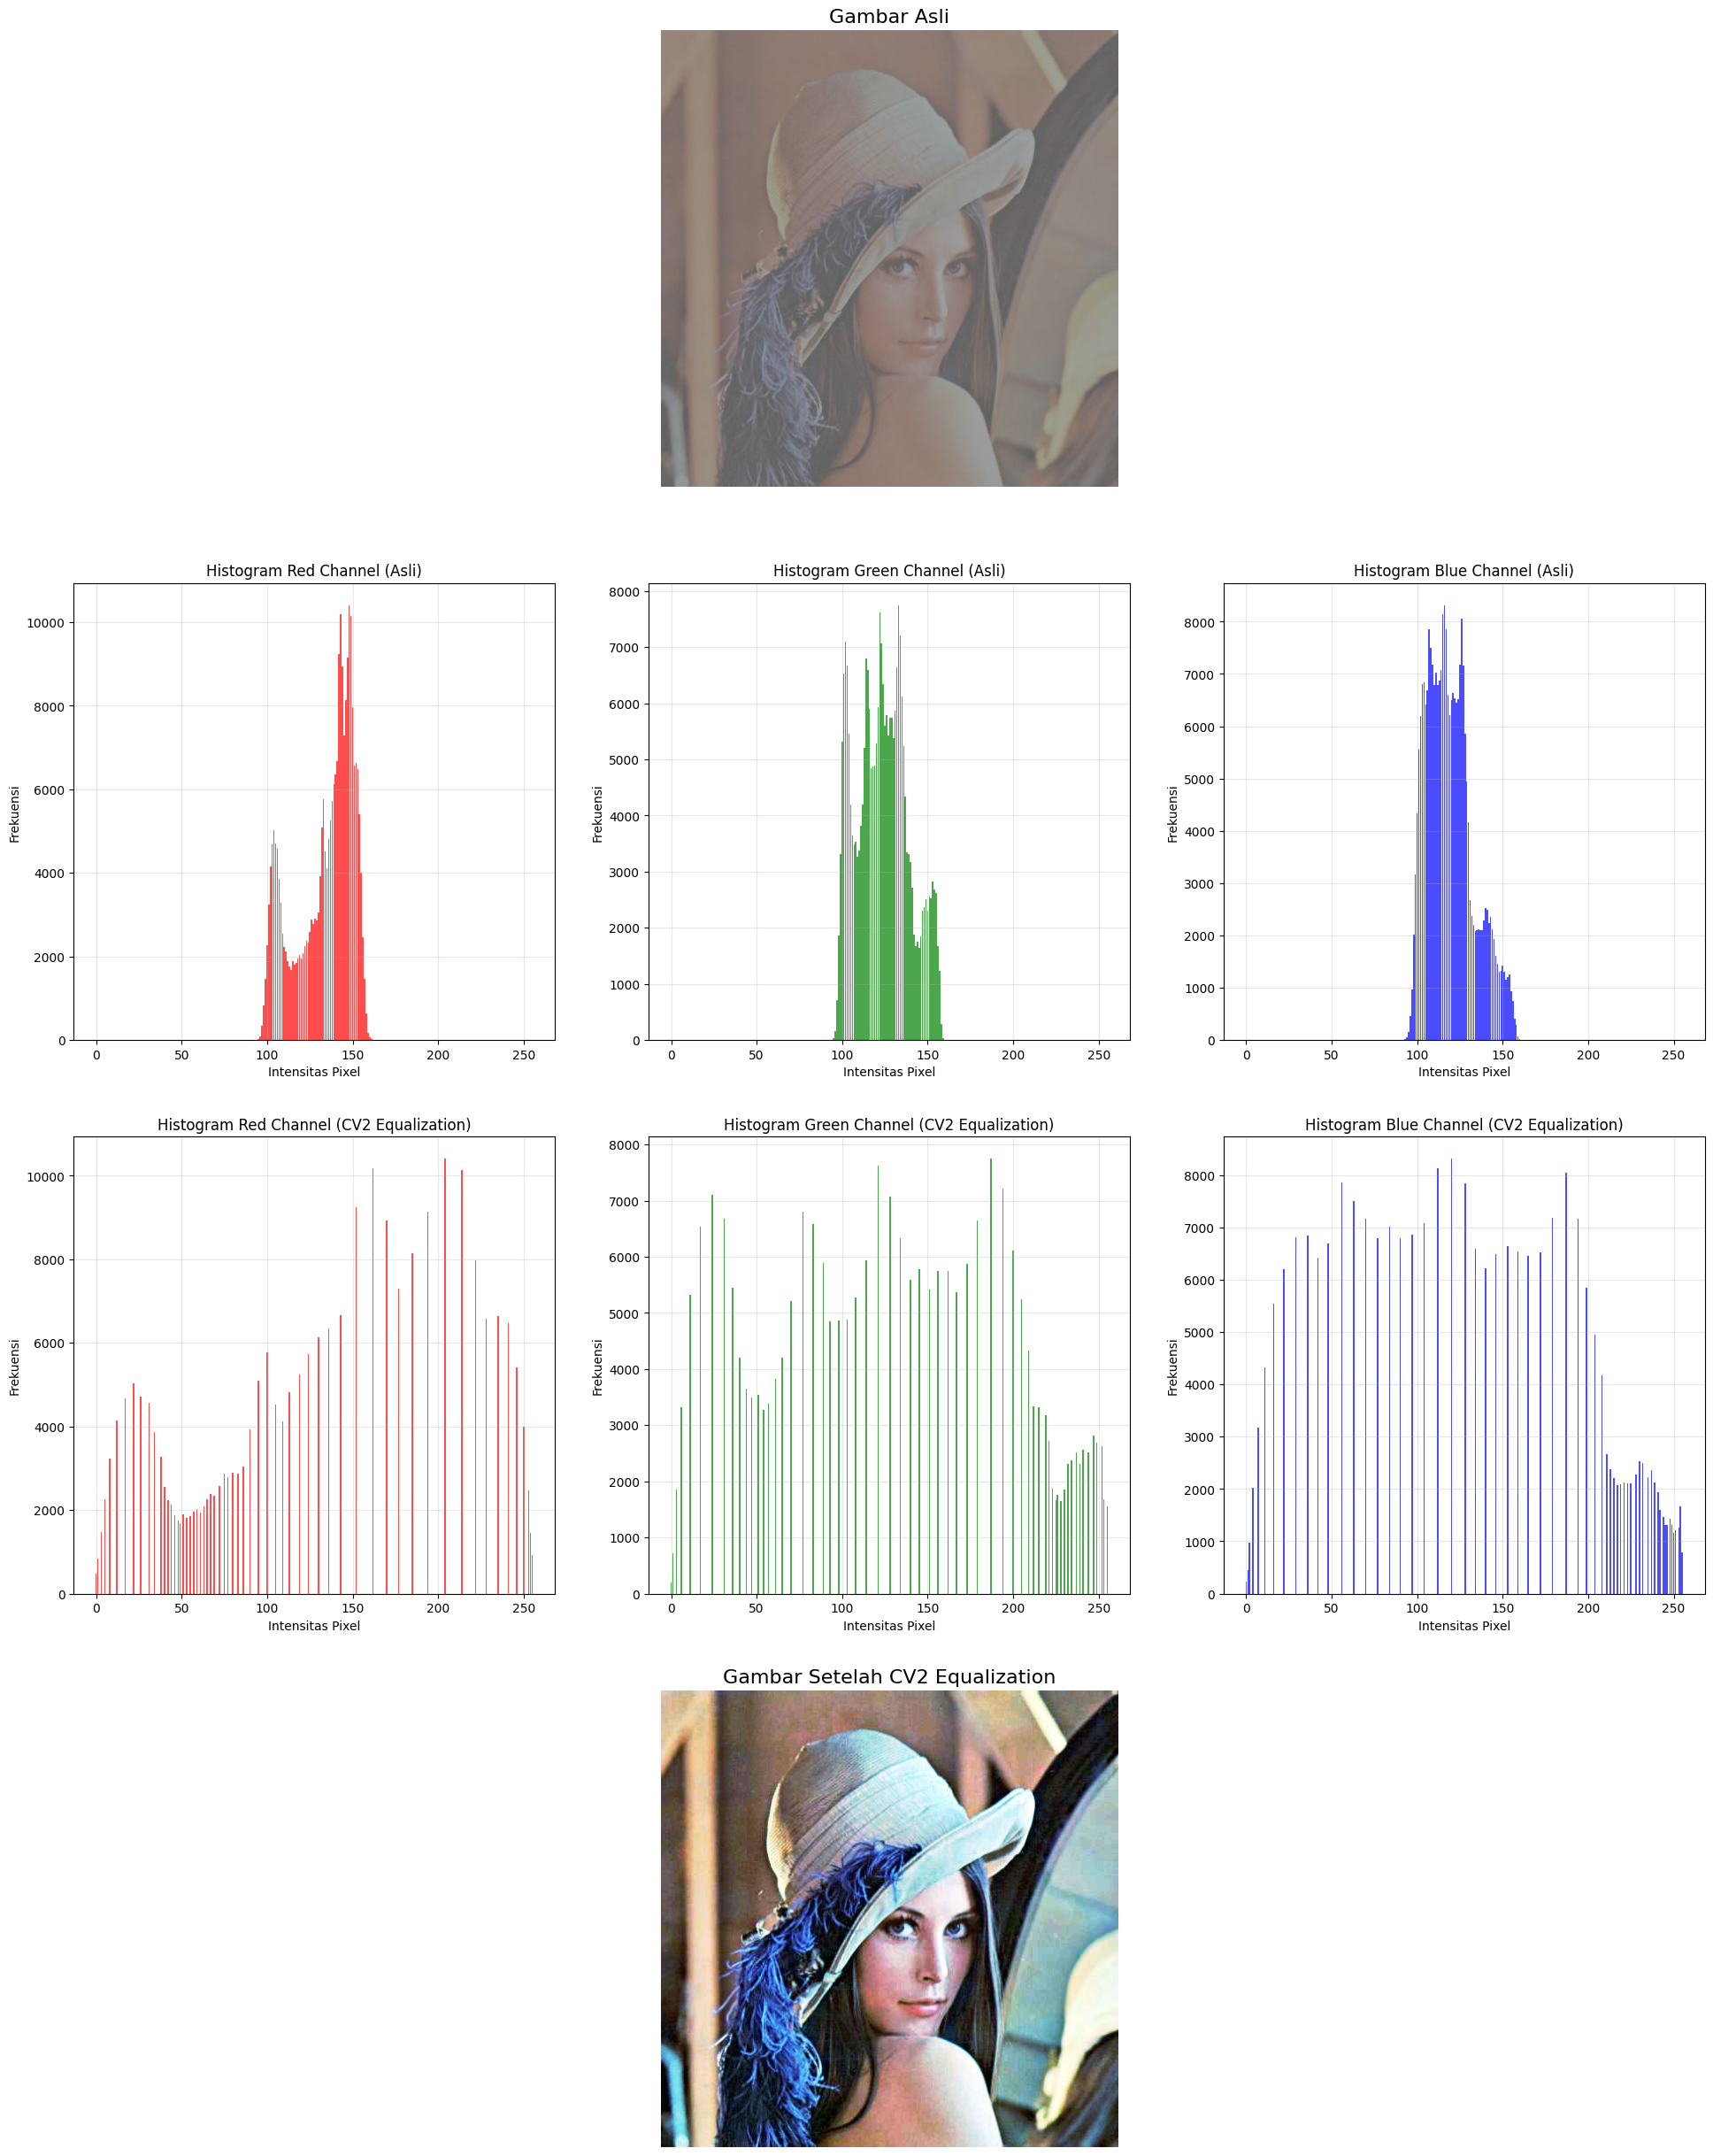

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def plot_histogram(ax, data, color, title):
    hist, bins = np.histogram(data.flatten(), 256, [0, 256])
    ax.bar(range(256), hist, color=color, alpha=0.7)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Intensitas Pixel')
    ax.set_ylabel('Frekuensi')
    ax.grid(True, alpha=0.3)

# Baca gambar
image_path = '/content/drive/MyDrive/pcvk/lena_lc.jpg'
img = cv2.imread(image_path)
if img is None:
    print(f"Gagal membaca citra dari path: {image_path}")
    exit()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Pisahkan channel
r, g, b = cv2.split(img)

# Equalization menggunakan CV2
r_eq_cv2 = cv2.equalizeHist(r)
g_eq_cv2 = cv2.equalizeHist(g)
b_eq_cv2 = cv2.equalizeHist(b)

# Gabungkan kembali channel setelah CV2 equalization
img_eq_cv2 = cv2.merge([r_eq_cv2, g_eq_cv2, b_eq_cv2])

# Setup plot
plt.figure(figsize=(20, 25))
gs = GridSpec(4, 3, height_ratios=[1, 1, 1, 1])

# Gambar asli
ax_original = plt.subplot(gs[0, :])
ax_original.imshow(img)
ax_original.set_title('Gambar Asli', fontsize=16)
ax_original.axis('off')

# Histogram asli
plot_histogram(plt.subplot(gs[1, 0]), r, 'red', 'Histogram Red Channel (Asli)')
plot_histogram(plt.subplot(gs[1, 1]), g, 'green', 'Histogram Green Channel (Asli)')
plot_histogram(plt.subplot(gs[1, 2]), b, 'blue', 'Histogram Blue Channel (Asli)')

# Histogram setelah equalization dengan CV2
plot_histogram(plt.subplot(gs[2, 0]), r_eq_cv2, 'red', 'Histogram Red Channel (CV2 Equalization)')
plot_histogram(plt.subplot(gs[2, 1]), g_eq_cv2, 'green', 'Histogram Green Channel (CV2 Equalization)')
plot_histogram(plt.subplot(gs[2, 2]), b_eq_cv2, 'blue', 'Histogram Blue Channel (CV2 Equalization)')

# Gambar setelah CV2 equalization
ax_eq_cv2 = plt.subplot(gs[3, :])
ax_eq_cv2.imshow(img_eq_cv2)
ax_eq_cv2.set_title('Gambar Setelah CV2 Equalization', fontsize=16)
ax_eq_cv2.axis('off')

plt.tight_layout(pad=3.0)
plt.show()


7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

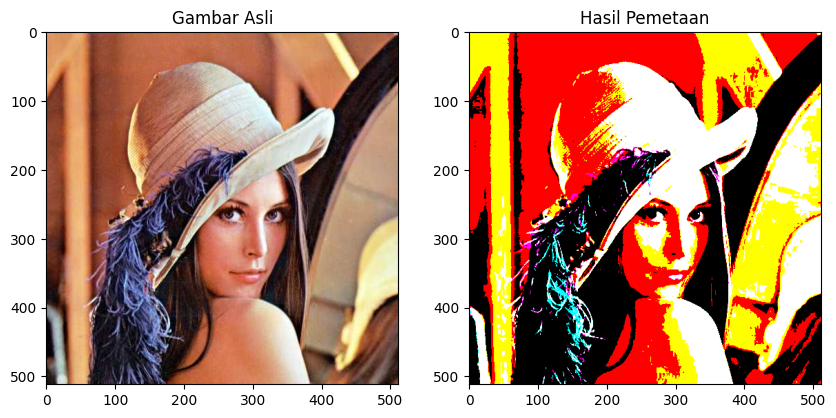

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load gambar lena.jpg
img = cv2.imread('/content/drive/MyDrive/pcvk/lena.jpg')

# Definisikan warna-warna yang akan digunakan
warna = [
    (0, 0, 0),  # Hitam
    (0, 255, 0),  # Hijau
    (255, 255, 0),  # Kuning
    (0, 0, 255),  # Biru
    (0, 255, 255),  # Cyan
    (255, 0, 255),  # Magenta
    (255, 255, 255),  # Putih
]

# Buat fungsi untuk melakukan pemetaan warna
def pemetaan_warna(pixel):
    jarak_min = float('inf')
    warna_terdekat = None
    for w in warna:
        jarak = np.linalg.norm(np.array(pixel) - np.array(w))
        if jarak < jarak_min:
            jarak_min = jarak
            warna_terdekat = w
    return warna_terdekat

# Lakukan pemetaan warna pada gambar
img_pemetaan = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_pemetaan[i, j] = pemetaan_warna(img[i, j])

# Display hasil pemetaan
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_pemetaan, cv2.COLOR_BGR2RGB))
plt.title('Hasil Pemetaan')

plt.show()

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering)berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

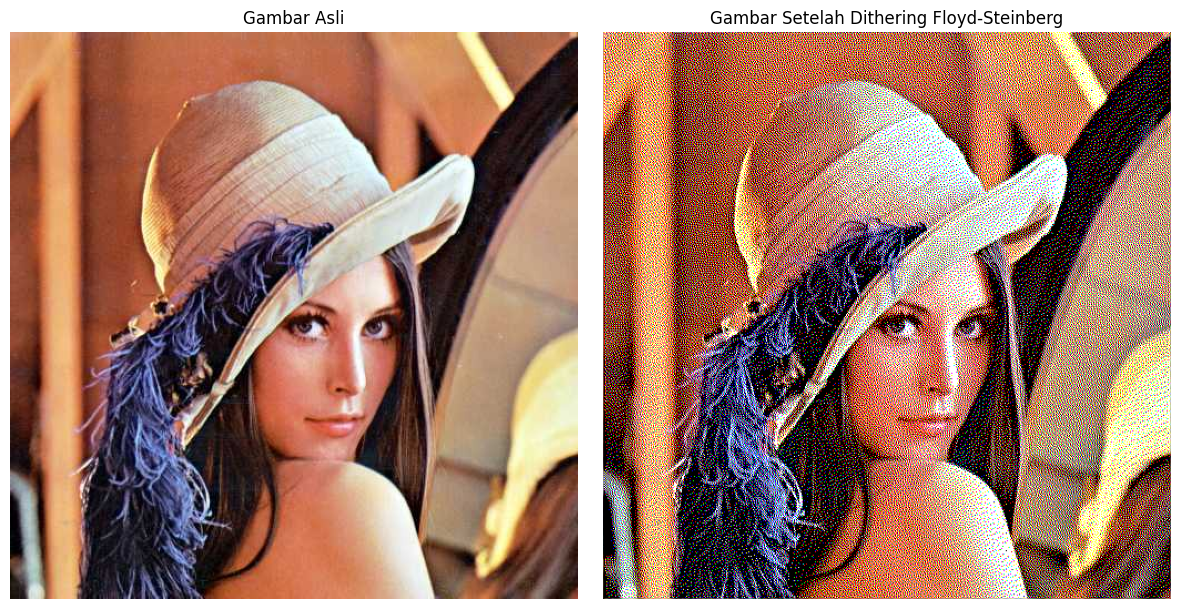

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def threshold(value):
    if value > 255:
        return 255
    elif value < 0:
        return 0
    return int(value)

def floyd_steinberg_dithering(image, jarakPixel=1):
    height, width = image.shape[:2]

    # Konversi gambar ke float untuk perhitungan yang lebih akurat
    image = image.astype(np.float32)

    for y in range(height - 1):
        for x in range(1, width - 1):
            for c in range(3):  # Untuk setiap channel warna (BGR)
                old_pixel = image[y, x, c]
                new_pixel = np.round(jarakPixel * old_pixel / 255.0) * (255 / jarakPixel)
                image[y, x, c] = new_pixel
                error = old_pixel - new_pixel

                # Distribusi error ke pixel tetangga
                image[y, x + 1, c] = threshold(image[y, x + 1, c] + error * 7 / 16)
                image[y + 1, x - 1, c] = threshold(image[y + 1, x - 1, c] + error * 3 / 16)
                image[y + 1, x, c] = threshold(image[y + 1, x, c] + error * 5 / 16)
                image[y + 1, x + 1, c] = threshold(image[y + 1, x + 1, c] + error * 1 / 16)

    return image.astype(np.uint8)

# Baca gambar
image_path = '/content/drive/MyDrive/pcvk/lena.jpg'
img = cv2.imread(image_path)
if img is None:
    print(f"Gagal membaca citra dari path: {image_path}")
    exit()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Lakukan dithering
dithered_img = floyd_steinberg_dithering(img.copy())

# Tampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(img)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(122)
plt.imshow(dithered_img)
plt.title('Gambar Setelah Dithering Floyd-Steinberg')
plt.axis('off')

plt.tight_layout()
plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

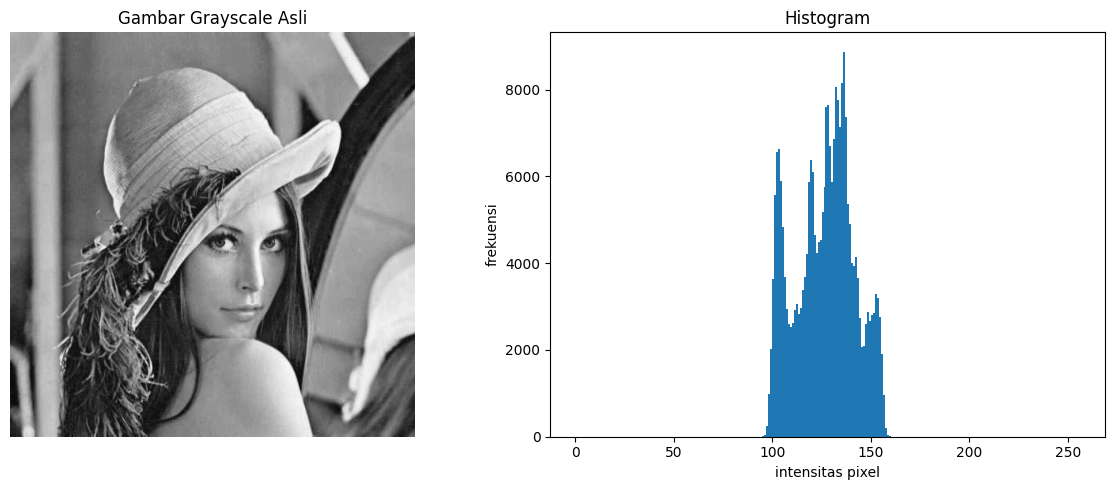

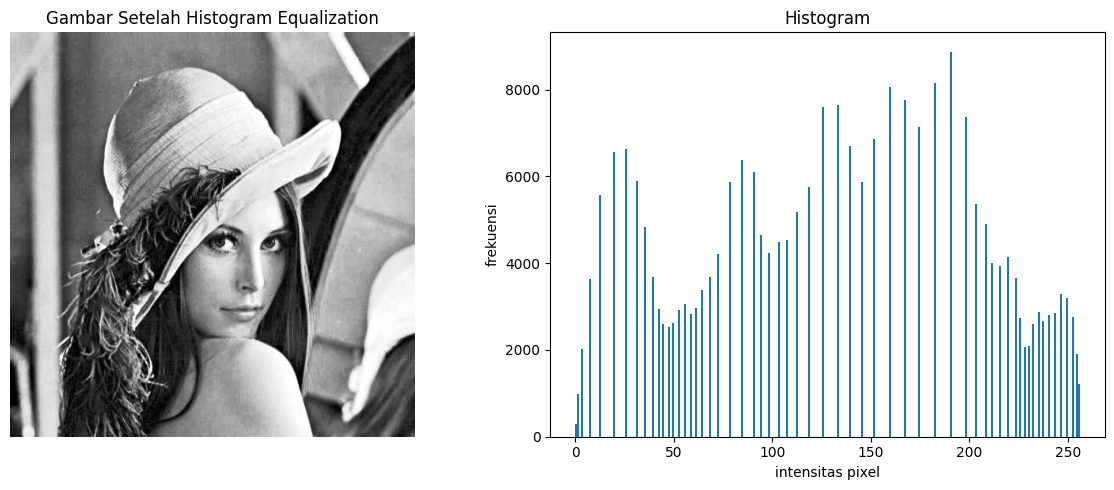

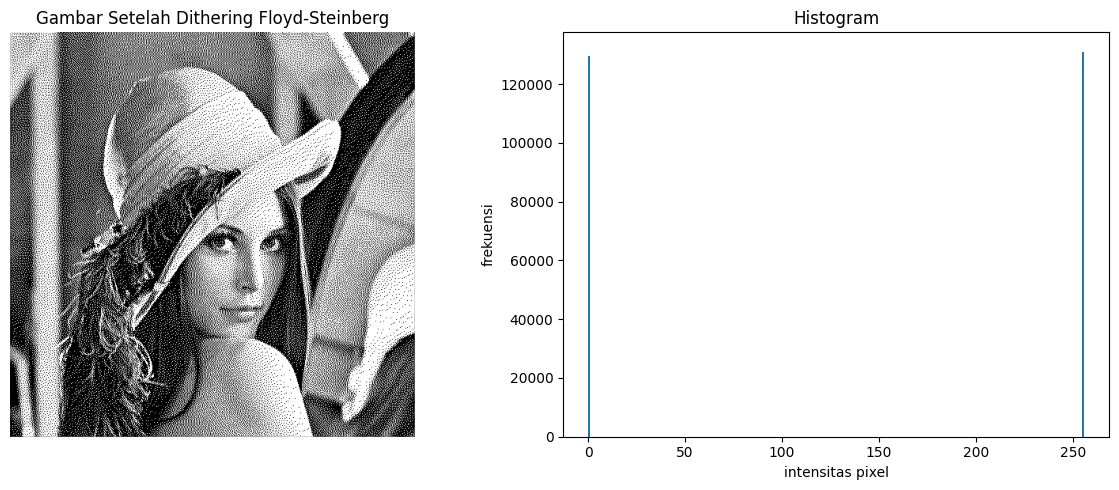

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def threshold(value):
    return np.clip(value, 0, 255).astype(np.uint8)

def floyd_steinberg_dithering(image):
    height, width = image.shape
    for y in range(height - 1):
        for x in range(1, width - 1):
            old_pixel = image[y, x]
            new_pixel = 255 if old_pixel > 127 else 0
            image[y, x] = new_pixel
            error = old_pixel - new_pixel

            image[y, x + 1] = threshold(image[y, x + 1] + error * 7 / 16)
            image[y + 1, x - 1] = threshold(image[y + 1, x - 1] + error * 3 / 16)
            image[y + 1, x] = threshold(image[y + 1, x] + error * 5 / 16)
            image[y + 1, x + 1] = threshold(image[y + 1, x + 1] + error * 1 / 16)

    return image

def plot_image_and_histogram(image, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.subplot(122)
    plt.hist(image.ravel(), 256, [0, 256])
    plt.title('Histogram')
    plt.xlabel('intensitas pixel')
    plt.ylabel('frekuensi')

    plt.tight_layout()
    plt.show()

# Baca gambar
image_path = '/content/drive/MyDrive/pcvk/lena_lc.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    print(f"Gagal membaca citra dari path: {image_path}")
    exit()

# Tampilkan gambar grayscale asli dan histogramnya
plot_image_and_histogram(img, 'Gambar Grayscale Asli')

# Lakukan histogram equalization
img_eq = cv2.equalizeHist(img)

# Tampilkan gambar setelah histogram equalization dan histogramnya
plot_image_and_histogram(img_eq, 'Gambar Setelah Histogram Equalization')

# Lakukan dithering Floyd-Steinberg
img_dither = floyd_steinberg_dithering(img_eq.copy())

# Tampilkan gambar setelah dithering dan histogramnya
plot_image_and_histogram(img_dither, 'Gambar Setelah Dithering Floyd-Steinberg')